In [1]:
import numpy as np

In [5]:
with open('sclit-learn_python/20200509ipynb/2D_example.csv') as f:
    print(f.read())

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-3.269730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-2.931415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,7.582103
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,-6.029489,-1.831199
0,1.116025,3.353602



In [6]:
data = np.loadtxt('sclit-learn_python/20200509ipynb/2D_example.csv', delimiter=",")

In [8]:
# 一行目のラベルをyに入れて整数に変換する
y = data[:,0].astype(int)
y

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [11]:
# 2列目3列目のデータをXXに入れる
X = data[:, 1:3]
X

array([[-7.428476,  1.509903],
       [ 2.980693,  1.960821],
       [ 3.988255,  4.636389],
       [-5.789437, -4.621614],
       [-4.894447, -3.26973 ],
       [-1.933949, -0.047276],
       [-1.611771,  5.932201],
       [-6.670152, -1.036282],
       [-2.931415, -0.104475],
       [-0.074762,  1.070002],
       [-2.691793,  4.168774],
       [ 0.461182,  3.453438],
       [-1.354135,  3.751657],
       [-6.229476, -1.209434],
       [ 2.778594,  7.582103],
       [-5.719578, -0.243509],
       [ 0.928322,  3.20852 ],
       [ 0.850475,  2.908955],
       [-6.029489, -1.831199],
       [ 1.116025,  3.353602]])

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
# 色設定
plt.set_cmap(plt.cm.Paired)

<Figure size 432x288 with 0 Axes>

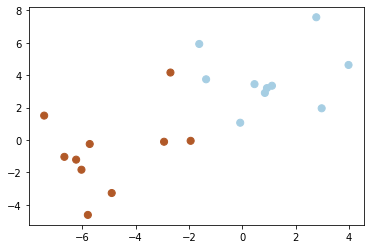

In [16]:
# 色(c)は0/1のラベル(y)に従ってつける
plt. scatter(X[:,0], X[:,1], c=y, s = 50)

In [33]:
# 境界線を引く関数の定義
def plotBoundary(X, clf, mesh = True, boundary = True, n_neighbors=1):
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])
    
    XX, YY = np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not

    if boundary:
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=[0.5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [24]:
from sklearn import neighbors
# オブジェクト作成
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

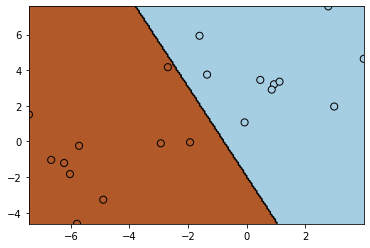

In [37]:
clf.fit(X ,y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y ,edgecolors='k')
plotBoundary(X, clf)

In [34]:
# ロジスティック回帰による学習
# モジュールの準備
from sklearn import linear_model

# オブジェクト作成
clf = linear_model.LogisticRegression()

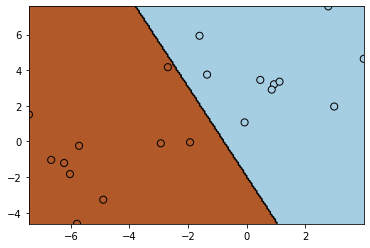

In [35]:
clf.fit(X, y) # 学習

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

In [42]:
# SVM回帰による学習
from sklearn import svm
clf = svm.SVC(kernel = 'linear')

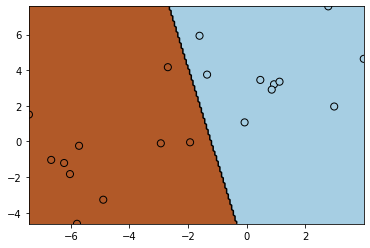

In [43]:
clf.fit(X, y) # 学習

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

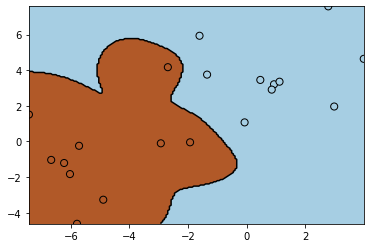

In [45]:
#  RBFカーネル(Gaussian カーネル)を用いたSVM
# from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='auto')

clf.fit(X, y) 
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary(X, clf) 

## がんのデータを識別する

In [47]:
import numpy as np

In [48]:
from sklearn.datasets import load_breast_cancer

In [64]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [51]:
X = data.data
X.shape

(569, 30)

In [52]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [54]:
# データの特徴
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [56]:
y = data.target
y.shape

(569,)

In [57]:
y[0]

0

In [65]:
# target の0:malignant, 1:benign
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [67]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [69]:
# 線形モデルを準備
from sklearn import linear_model

# 識別器を作成
clf = linear_model.LogisticRegression(solver='liblinear')
clf

LogisticRegression(solver='liblinear')

In [73]:
import numpy as np
from sklearn.model_selection import train_test_split

a = np.arange(10)
print(a)
# [0 1 2 3 4 5 6 7 8 9]

print(train_test_split(a))
# [array([3, 9, 6, 1, 5, 0, 7]), array([2, 8, 4])]

print(type(train_test_split(a)))
# <class 'list'>

print(len(train_test_split(a)))
# 2

[0 1 2 3 4 5 6 7 8 9]
[array([8, 0, 4, 9, 3, 1, 6]), array([2, 5, 7])]
<class 'list'>
2


In [79]:
test, train = sklearn.model_selection.train_test_split(a)
print(test)
print(train)

[1 6 4 9 2 0 3]
[7 8 5]


In [87]:
#、訓練data、テストデータをそれぞれ用意する
import sklearn
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,  test_size=0.7)
print(X_train.shape)
print(X_test.shape)

(170, 30)
(399, 30)


In [89]:
# トレーニングの実行
clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [91]:
# 精度を見る
print(clf.score(X_train, y_train))

0.9705882352941176


In [93]:
# テストデータで精度を見る
print(clf.score(X_test, y_test))

0.9223057644110275


In [100]:
# テストデータで判定する
y_pred =clf.predict(X_test)

In [101]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,y_pred))

0.9223057644110275


In [1]:
## sec31 アヤメ

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
X= data.data
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
X.shape

(150, 4)

In [6]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [7]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
y = data.target
y.shape

(150,)

In [9]:
y[0]

0

In [10]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [12]:
clf

LogisticRegression()

In [35]:
import sklearn
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,  test_size=0.5)
print(X_train.shape)
print(X_test.shape)

(75, 4)
(75, 4)


In [36]:
X_train[0]

array([5.8, 2.7, 4.1, 1. ])

In [37]:
clf.fit(X_train, y_train)

LogisticRegression()

In [38]:
print(clf.score(X_train, y_train))

0.9866666666666667


In [39]:
print(clf.score(X_test, y_test))

0.9466666666666667


In [20]:
# 別の方法でランダムにテストデータを作る

In [21]:
from sklearn.model_selection import ShuffleSplit

In [40]:
ss = ShuffleSplit(n_splits=1, train_size=0.5, test_size=0.5, random_state=0)

In [41]:
type(ss)

sklearn.model_selection._split.ShuffleSplit

In [42]:
trainI, testI = next(ss.split(X))

In [43]:
X_train, X_test = X[trainI], X[testI]
y_train, y_test = y[trainI], y[testI]

In [44]:
clf_iris2 = clf.fit(X_train, y_train)

In [45]:
print(clf_iris2.score(X_train, y_train))

0.9733333333333334


In [46]:
print(clf_iris2.score(X_test, y_test))

0.9333333333333333


In [48]:
trainI

array([  3, 149,  98,   6,  68, 109,  96,  12, 102, 120, 104, 128,  46,
        11, 110, 124,  41, 148,   1, 113, 139,  42,   4, 129,  17,  38,
         5,  53, 143, 105,   0,  34,  28,  55,  75,  35,  23,  74,  31,
       118,  57, 131,  65,  32, 138,  14, 122,  19,  29, 130,  49, 136,
        99,  82,  79, 115, 145,  72,  77,  25,  81, 140, 142,  39,  58,
        88,  70,  87,  36,  21,   9, 103,  67, 117,  47])

In [56]:
# 必要なモジュールのインポート
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model

In [65]:
ss = ShuffleSplit(n_splits=10,     # 分割を10個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

scores = []
for train_index, test_index in ss.split(X): # 学習データとテストデータのインデックスを作成
    
    X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
    y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

    clf.fit(X_train, y_train)         # 識別器の学習
    score = clf.score(X_test, y_test) # テストデータの精度
    scores.append(score)
    print(train_index, test_index)

[  3 149  98   6  68 109  96  12 102 120 104 128  46  11 110 124  41 148
   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28  55  75  35
  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49 136  99  82
  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36  21   9 103
  67 117  47] [114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80
 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95
  20  15  52]
[101  29  81  20  46  51  53  23  27   2  28  37 111  10  84 137 127  43
  87  69 144 140  35  76   3  82 145 116  88  44 147   1  93  38  11 115
  54  40  18  41  79  24  56  71  13  31  85  70 132 125 123 100  32 104
  83 117 118 138  25 110  16  75 109 121  86 139   4  96  14  61  67 149
  95  19  72] [ 92 141 130 119  48 143 122  63  26  64  42 108  91  77  22 148   6  65
  47  68 

C:\Users\yuji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yuji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[ 25  73  37   1  92  24  93  43 114 144  63 115  12  36  60  85  35  45
 130  62   8  14  19  69   5  56  81  53 149 109  98  33  46  97  90  16
 148 136 118  54  39  99 110  67 131 104  26  61 102 101 117 146   0  23
   9  52 140   7 142   2  11  30  59 116 100   3  86 139  48 121  89 138
  42  32 112]
[ 84  47  90  65  96 144  28  32  10 131 101 145 135  26 138  77  85 111
 130  76  19  66   2   1  13  98 129  64  16  24  58 149 108 123  74 106
  39  21  56 100 146 125  33   3  27 126  67  81 120  60  51  29  14 140
 114  30 143 102  99 124  12  50   9  49 128  35 117  80  36 105 132 119
  68 103  61] [  6  92  91  89 121 116 109  43 112 127  11  25  31 142 136  57  82  41
 141   8  52 122  79   0  88  69  63   5  34  75 133  59  46  72  48 104
   7  93  55  54  22   4 115  40  94  37  83  78  38  44  62 118  20  86
  45 110  87  23 148  95 113 139  17 147  97  42 134  73 107  18  15 137
  70  53  71]
[ 22  62 124  17  61  51 109  58  63  56 123  49 138  35  29 105  15 126
  27 120 

In [64]:
print(ss)

ShuffleSplit(n_splits=10, random_state=0, test_size=0.5, train_size=0.5)


In [60]:
print(scores)

[0.9333333333333333, 0.9333333333333333, 0.9866666666666667, 0.9466666666666667, 0.96, 0.9466666666666667, 0.9733333333333334, 1.0, 0.96, 0.9866666666666667]


In [61]:
scores = np.array(scores)

print(scores)

[0.93333333 0.93333333 0.98666667 0.94666667 0.96       0.94666667
 0.97333333 1.         0.96       0.98666667]
